In [163]:
import numpy as np
import pandas as pd
from pandas import *
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from mpl_toolkits import mplot3d
from pandas import ExcelWriter
from pandas import ExcelFile
from sklearn.metrics import r2_score,mean_squared_error

In [164]:
def normal(X):    
    return (X-X.mean(axis=0))/X.std(axis=0)    

In [165]:
df = pd.read_csv("C:/Users/PAPAM/Desktop/FODS/3D_spatial_network.txt",sep=",",header=None)
t=df.iloc[:,3]
X=df.iloc[:,1:3]
t=np.c_[t]
X=normal(X)
t=normal(t)
X= np.c_[np.ones((len(X), 1)), X]


In [233]:
class stochgrad:
    def __init__(self, eta=0.001, n=5000,sr=1e-10):
        self.eta = eta
        self.n= n
        self.sr= sr
    def predict(self, x):   
        return np.dot(x, self.w_)
    def fit(self, x, y):
        self.cost_ = []
        self.rmse_ = []
        self.r2_ = []
        self.w_ = np.random.randn(x.shape[1], 1)
        c1=c2=0
        for i in range(self.n):
            m = y.size
            rand_int = np.random.randint(0,m-1)
            x_j = x[rand_int,:].reshape(1,X.shape[1])
            y_j = y[rand_int,:].reshape(1,1)
            y_pred_j = np.dot(x_j,self.w_)
            residuals = y_pred_j- y_j
            gradient_vector = np.dot(x_j.T,residuals)
            k=(self.eta) * gradient_vector
            self.w_ -= k
            y_pred = np.dot(x,self.w_)
            residuals2 = y_pred - y
            cost = np.sum((residuals2 ** 2)) / (2 * m)
            print(i, ' ',cost)
            c1=c2
            c2=cost
            self.rmse_.append((cost*2)**(0.5))
            ssr = np.sum((residuals)**2)
            sst = np.sum((y - np.mean(y))**2)
            self.r2_.append(1 - (ssr/sst))
            if abs(c2-c1)<self.sr:
                self.cost_.append(cost)
                break
            self.cost_.append(cost)

In [234]:
A=stochgrad()

In [242]:
A.fit(X,t)

0   1.5329188631547115
1   1.4865435137505092
2   1.4856727271842496
3   1.4829802348640293
4   1.4720534606148281
5   1.4504619347742203
6   1.4331490672871816
7   1.4347615751745113
8   1.4350456949710577
9   1.424200684669717
10   1.4258537850436008
11   1.429585024122121
12   1.419924801205844
13   1.4115703534301751
14   1.3977502342456385
15   1.3916091088674662
16   1.3786896217115154
17   1.3666014745249606
18   1.335444477611048
19   1.305785840737606
20   1.1835297244000882
21   1.1600715170759874
22   1.1129195224526645
23   1.1073839785836899
24   1.098336422245203
25   1.0957127641759992
26   1.075484352217521
27   1.0685512709766616
28   1.069674477252239
29   1.0652366397097
30   1.0690581916826543
31   1.0570653373204069
32   1.0514484068026162
33   1.0482983246331983
34   1.0442246692384554
35   1.0392830098977586
36   0.9848298055679201
37   0.9804522755778886
38   0.9637099194469221
39   0.9634939308958484
40   0.9580508822228792
41   0.9363203221976314
42   0.936071

In [243]:
A.w_

array([[ 0.04443109],
       [ 0.15382899],
       [-0.23683657]])

In [244]:
A.cost_[-1]

0.4887435366795955

In [245]:
A.rmse_[-1]

0.9886794593593977

In [246]:
A.r2_[-1]

0.9999995678599356

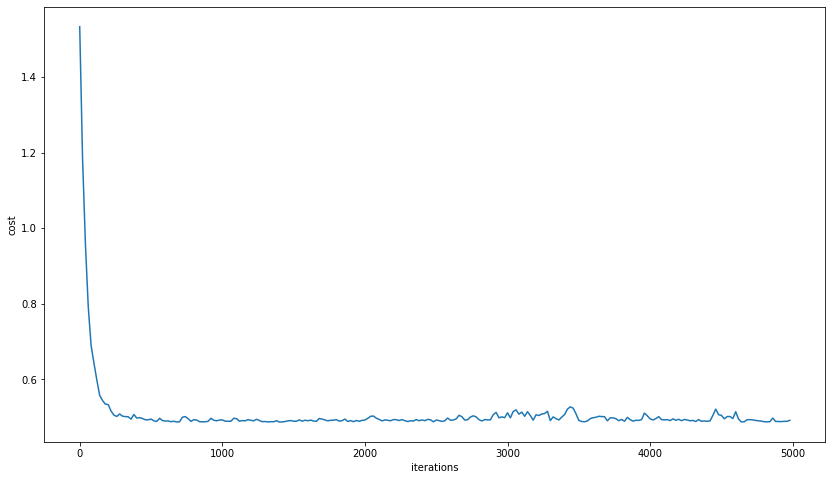

In [249]:
plotcost=[]
plt.figure(figsize=(14,8))
for j in range(0,len(A.cost_),20):
    plotcost.append(A.cost_ [j])
plt.plot(range(0,len(A.cost_),20),plotcost)
plt.xlabel('iterations')
plt.ylabel('cost')
plt.show()